In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime

# Carga de datos

In [ ]:
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1tdAktMe4lF3N94tpGhOsbC0wbOvLit0w")
df.head()

,area_construida,num_habitaciones,num_banos,antiguedad_anos,tipo_propiedad,zona,tiene_garaje,tiene_jardin,tiene_piscina,distancia_centro_km,puntuacion_vecindario,fecha_tasacion,id_propiedad,precio_tasacion
0,139.868566,4,2,11.554336,Casa,Sur,False,True,False,2.365667,9.342492,2022-10-28,PROP-000001,325463.359927
1,114.469428,2,4,3.565728,Duplex,Oeste,False,False,False,1.290826,6.544462,2024-06-16,PROP-000002,323240.808485
2,145.907542,6,2,25.002531,Casa,Este,True,True,True,10.676347,5.673493,2023-03-02,PROP-000003,466538.819798
3,180.921194,3,1,22.284207,Duplex,Centro,True,True,False,4.174574,8.542904,2022-09-07,PROP-000004,679654.809192
4,110.633865,6,4,2.354926,Apartamento,Sur,False,True,False,1.000000,8.046255,2023-11-17,PROP-000005,238134.581793


# Análisis Exploratorio

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area_construida        1500 non-null   float64
 1   num_habitaciones       1500 non-null   int64  
 2   num_banos              1500 non-null   int64  
 3   antiguedad_anos        1485 non-null   float64
 4   tipo_propiedad         1500 non-null   object 
 5   zona                   1500 non-null   object 
 6   tiene_garaje           1500 non-null   bool   
 7   tiene_jardin           1500 non-null   bool   
 8   tiene_piscina          1500 non-null   bool   
 9   distancia_centro_km    1500 non-null   float64
 10  puntuacion_vecindario  1485 non-null   float64
 11  fecha_tasacion         1500 non-null   object 
 12  id_propiedad           1500 non-null   object 
 13  precio_tasacion        1500 non-null   float64
dtypes: bool(3), float64(5), int64(2), object(4)
memory usage

In [ ]:
missing_info = pd.DataFrame({
    'Tipo': df.dtypes,
    'Valores Nulos': df.isnull().sum(),
    '% Nulos': (df.isnull().sum() / len(df) * 100).round(2)
})
display(missing_info)

,Tipo,Valores Nulos,% Nulos
area_construida,float64,0,0.0
num_habitaciones,int64,0,0.0
num_banos,int64,0,0.0
antiguedad_anos,float64,15,1.0
tipo_propiedad,object,0,0.0
zona,object,0,0.0
tiene_garaje,bool,0,0.0
tiene_jardin,bool,0,0.0
tiene_piscina,bool,0,0.0
distancia_centro_km,float64,0,0.0


In [ ]:
# Convertir la fecha de solicitud a datemtime
df['fecha_tasacion'] = pd.to_datetime(df['fecha_tasacion'])

In [ ]:
# Variable objetivo
target_col = 'precio_tasacion'

## Análisis de variables categóricas

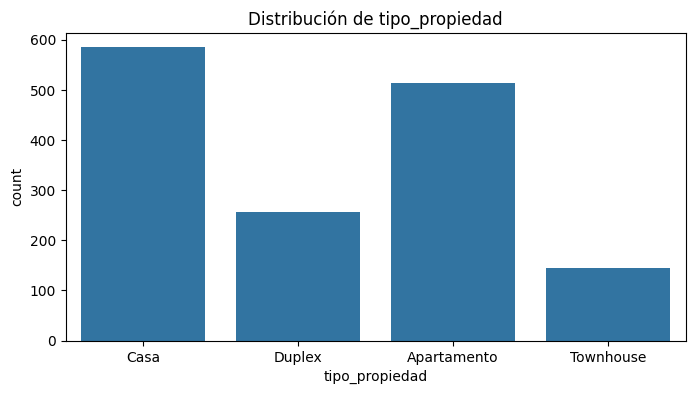

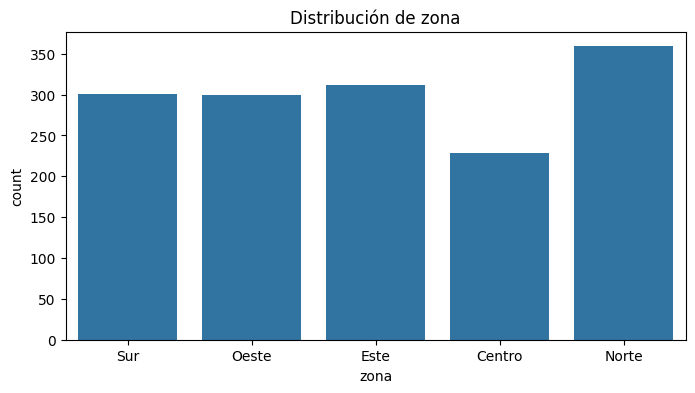

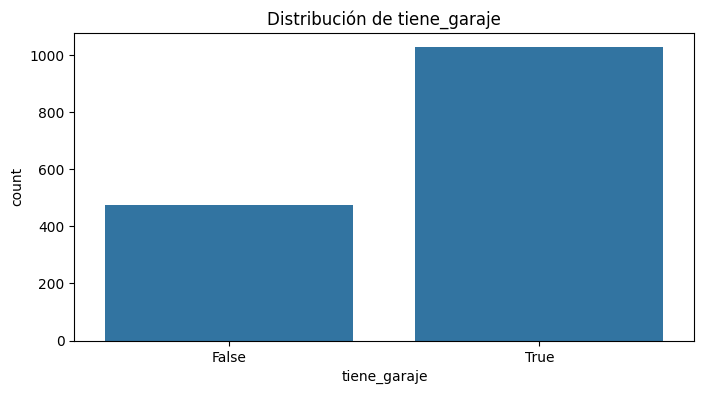

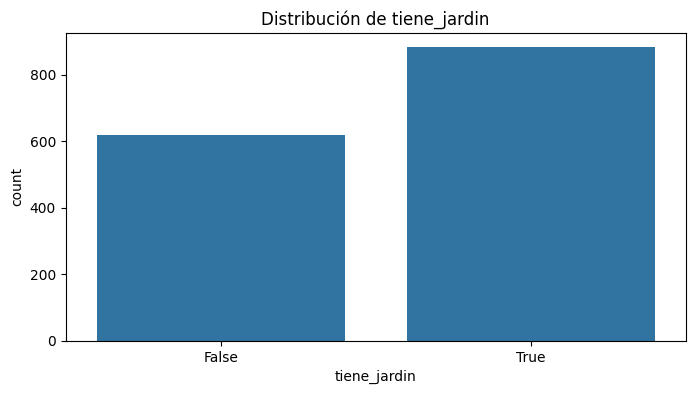

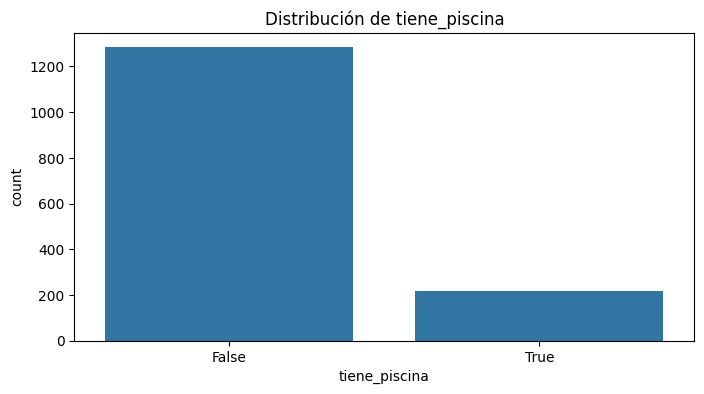

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col not in ['id_propiedad', 'fecha_tasacion']]

for col in categorical_cols:
    # Gráfico de distribución
    plt.figure(figsize=(8, 4))
    if df[col].nunique() > 5:
        # Para variables con muchos valores únicos, mostrar solo los top
        top_values = df[col].value_counts().head(10)
        sns.barplot(x=top_values.index, y=top_values.values)
        plt.title(f'Top 10 valores más frecuentes en {col}')
        plt.xticks(rotation=45)
    else:
        sns.countplot(data=df, x=col)
        plt.title(f'Distribución de {col}')
    plt.show()

## Análisis de variables numéricas

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove(target_col)  # Remover la variable objetivo

In [ ]:
# Función para detectar outliers
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers


Variable: area_construida
Valores nulos: 0 (0.00%)
Número de outliers (IQR method): 3 (0.20%)


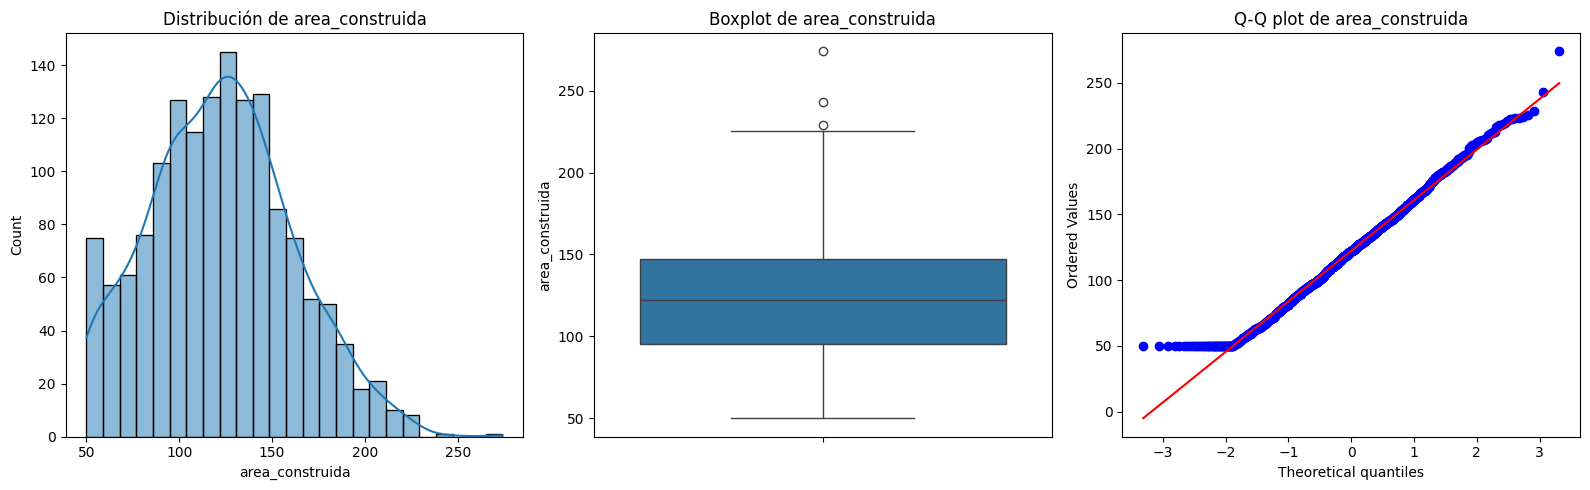


Variable: num_habitaciones
Valores nulos: 0 (0.00%)
Número de outliers (IQR method): 0 (0.00%)


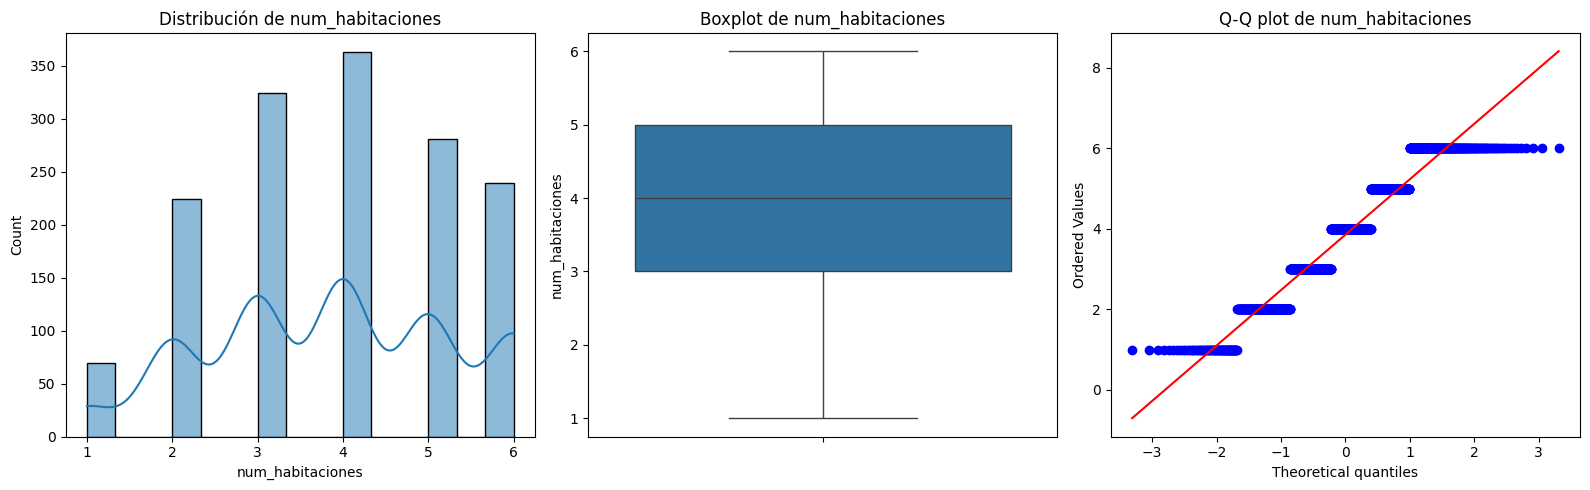


Variable: num_banos
Valores nulos: 0 (0.00%)
Número de outliers (IQR method): 0 (0.00%)


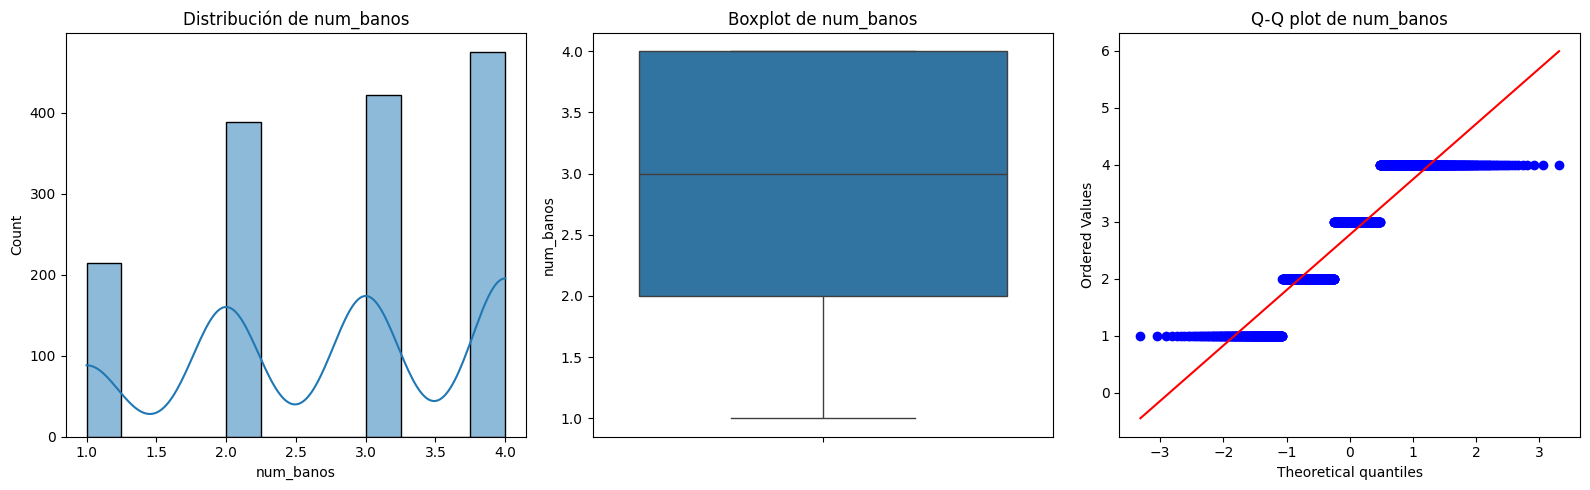


Variable: antiguedad_anos
Valores nulos: 15 (1.00%)
Número de outliers (IQR method): 82 (5.47%)


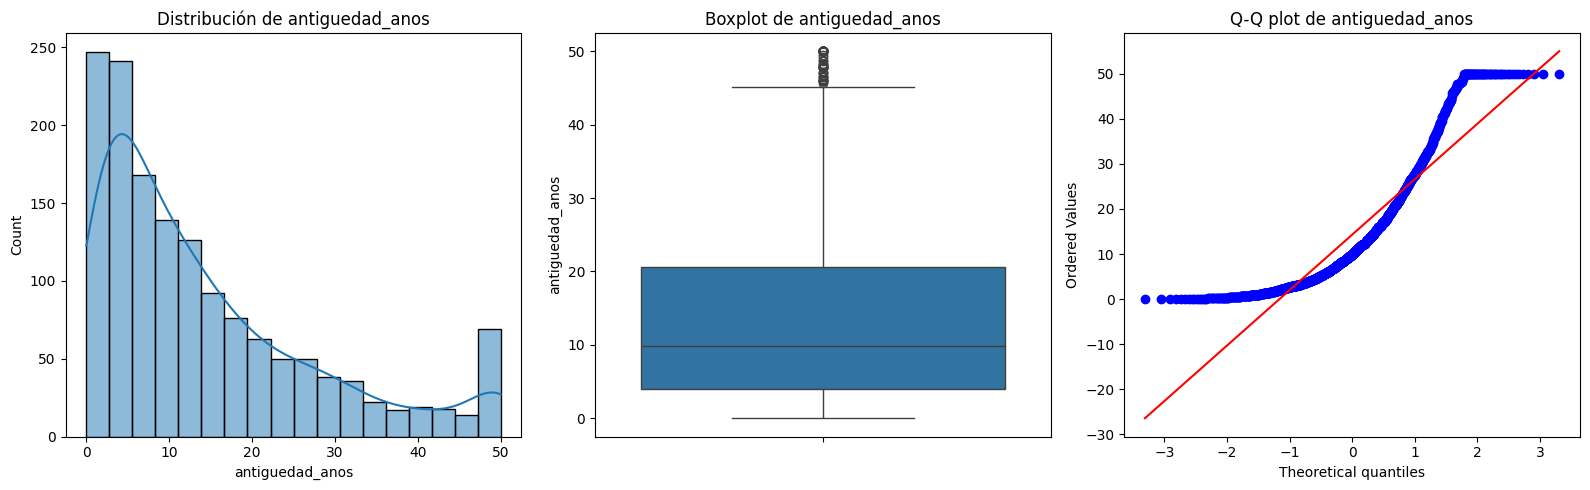


Variable: distancia_centro_km
Valores nulos: 0 (0.00%)
Número de outliers (IQR method): 70 (4.67%)


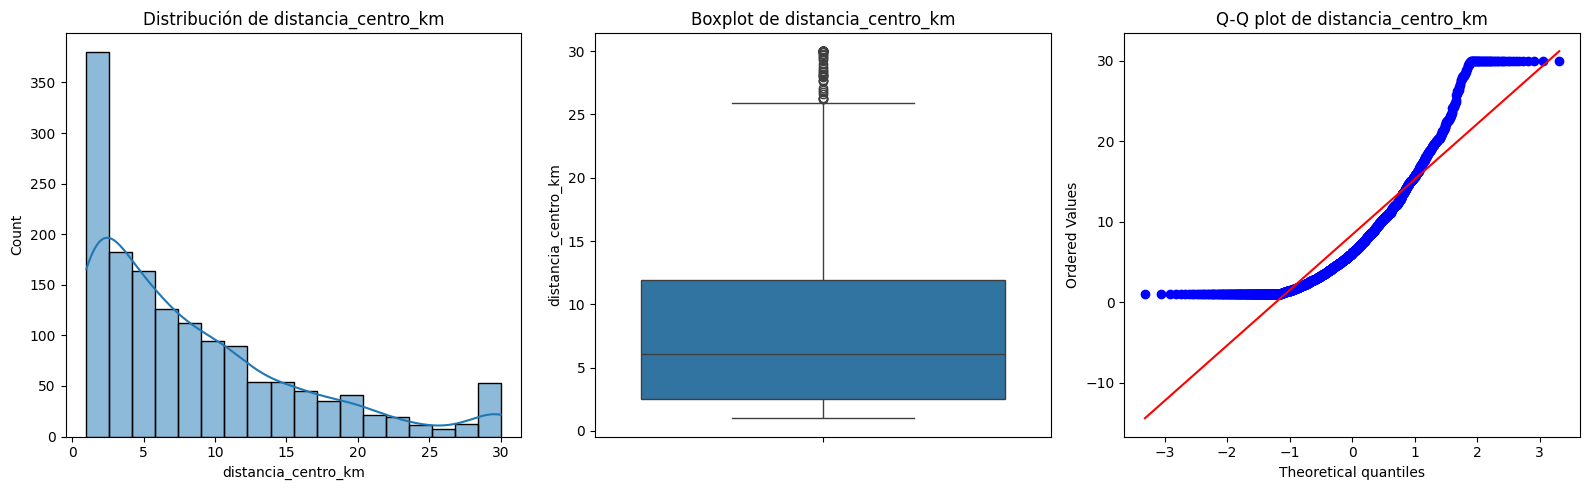


Variable: puntuacion_vecindario
Valores nulos: 15 (1.00%)
Número de outliers (IQR method): 5 (0.33%)


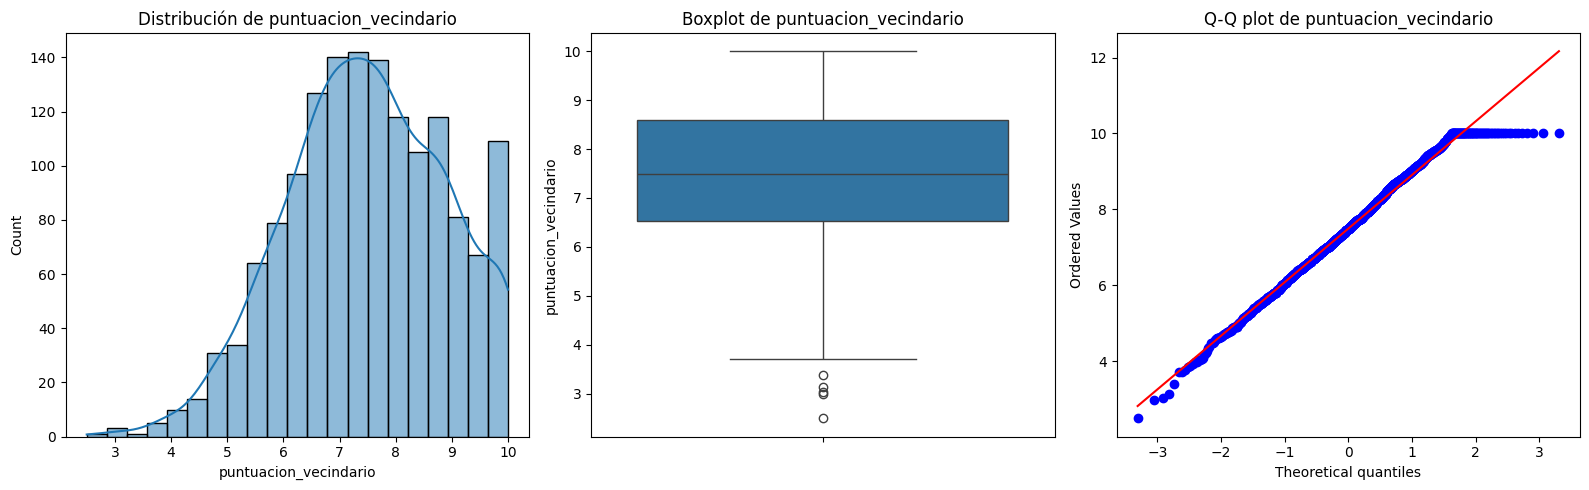

In [ ]:
# Análisis por variable numérica
for col in numeric_cols:
    print(f"\nVariable: {col}")

    # Análisis de nulos
    null_count = df[col].isnull().sum()
    print(f"Valores nulos: {null_count} ({null_count/len(df)*100:.2f}%)")

    # Análisis de outliers
    if null_count < len(df):  # Solo si hay datos no nulos
        outliers = detect_outliers(df, col)
        print(f"Número de outliers (IQR method): {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

        # Gráficos de distribución
        plt.figure(figsize=(16, 5))

        # Histograma y boxplot
        plt.subplot(1, 3, 1)
        sns.histplot(data=df, x=col, kde=True)
        plt.title(f'Distribución de {col}')

        plt.subplot(1, 3, 2)
        sns.boxplot(data=df, y=col)
        plt.title(f'Boxplot de {col}')

        # Gráfico Q-Q
        plt.subplot(1, 3, 3)
        stats.probplot(df[col].dropna(), plot=plt)
        plt.title(f'Q-Q plot de {col}')

        plt.tight_layout()
        plt.show()
    else:
        print("Todos los valores son nulos, no se puede analizar distribución")

## Análisis de variables temporales

In [ ]:
print("\nAnálisis de fecha_tasacion:")
print(f"Rango: {df['fecha_tasacion'].min()} a {df['fecha_tasacion'].max()}")
print(f"Período: {(df['fecha_tasacion'].max() - df['fecha_tasacion'].min()).days} días")


Análisis de fecha_tasacion:
Rango: 2022-01-01 00:00:00 a 2024-12-29 00:00:00
Período: 1093 días


In [ ]:
# Extraer componentes temporales
df['año_tasacion'] = df['fecha_tasacion'].dt.year
df['mes_tasacion'] = df['fecha_tasacion'].dt.month
df['dia_semana_tasacion'] = df['fecha_tasacion'].dt.day_name()

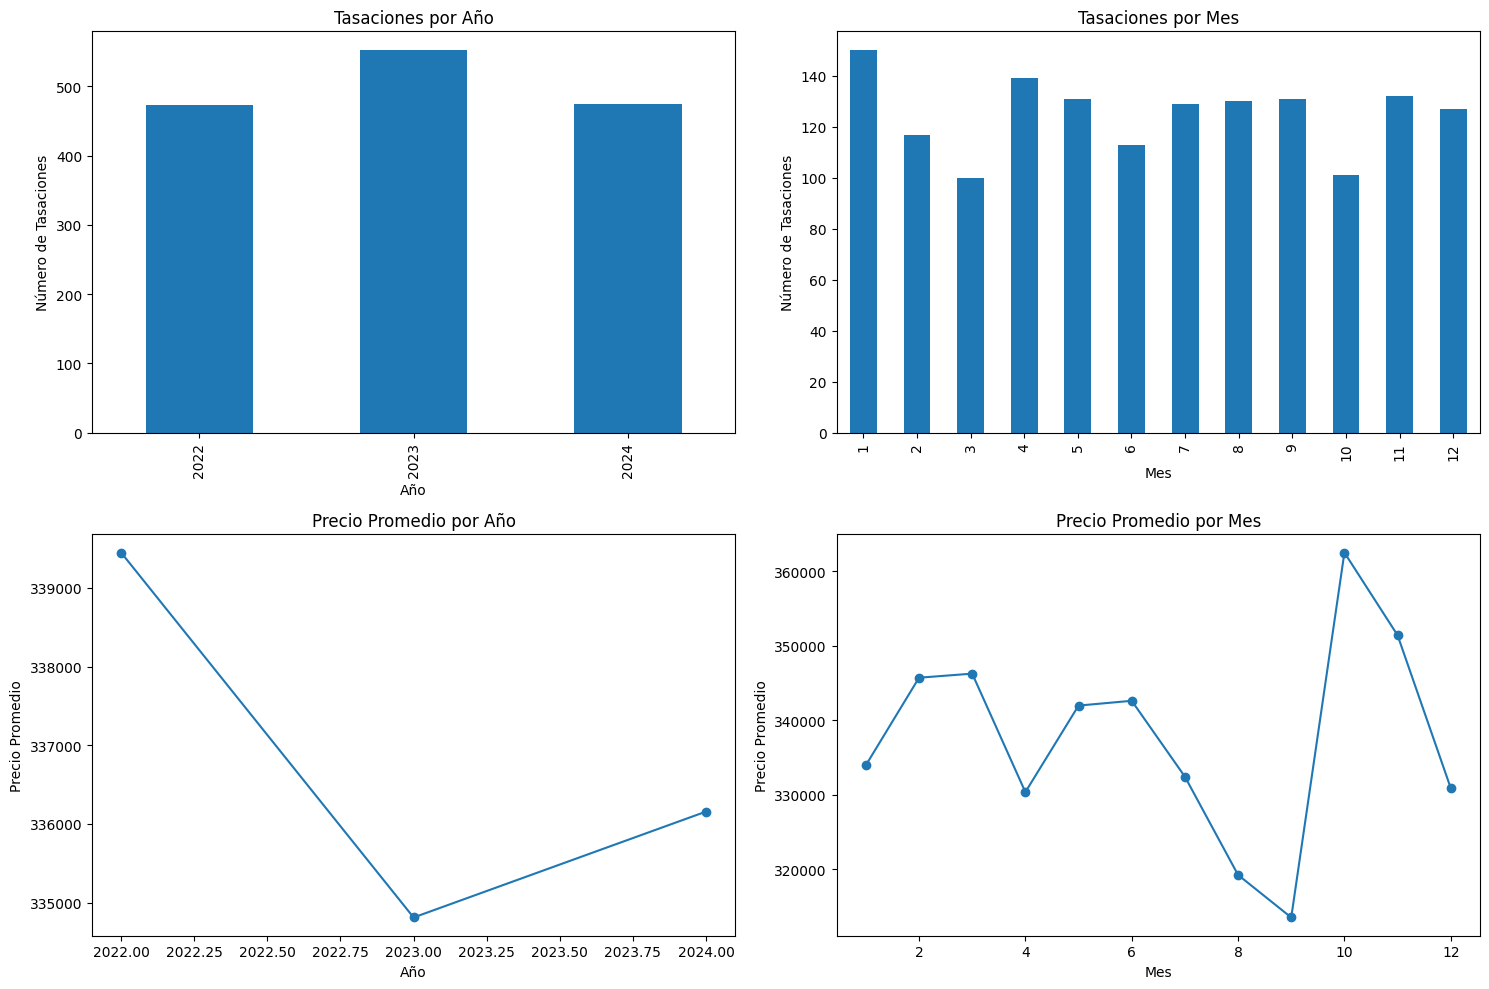

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Tasaciones por año
df['año_tasacion'].value_counts().sort_index().plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Tasaciones por Año')
axes[0, 0].set_xlabel('Año')
axes[0, 0].set_ylabel('Número de Tasaciones')

# Tasaciones por mes
df['mes_tasacion'].value_counts().sort_index().plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Tasaciones por Mes')
axes[0, 1].set_xlabel('Mes')
axes[0, 1].set_ylabel('Número de Tasaciones')

# Precio promedio por año
precio_por_año = df.groupby('año_tasacion')[target_col].mean()
precio_por_año.plot(kind='line', marker='o', ax=axes[1, 0])
axes[1, 0].set_title('Precio Promedio por Año')
axes[1, 0].set_xlabel('Año')
axes[1, 0].set_ylabel('Precio Promedio')

# Precio promedio por mes
precio_por_mes = df.groupby('mes_tasacion')[target_col].mean()
precio_por_mes.plot(kind='line', marker='o', ax=axes[1, 1])
axes[1, 1].set_title('Precio Promedio por Mes')
axes[1, 1].set_xlabel('Mes')
axes[1, 1].set_ylabel('Precio Promedio')

plt.tight_layout()
plt.show()

## Análisis de correlación

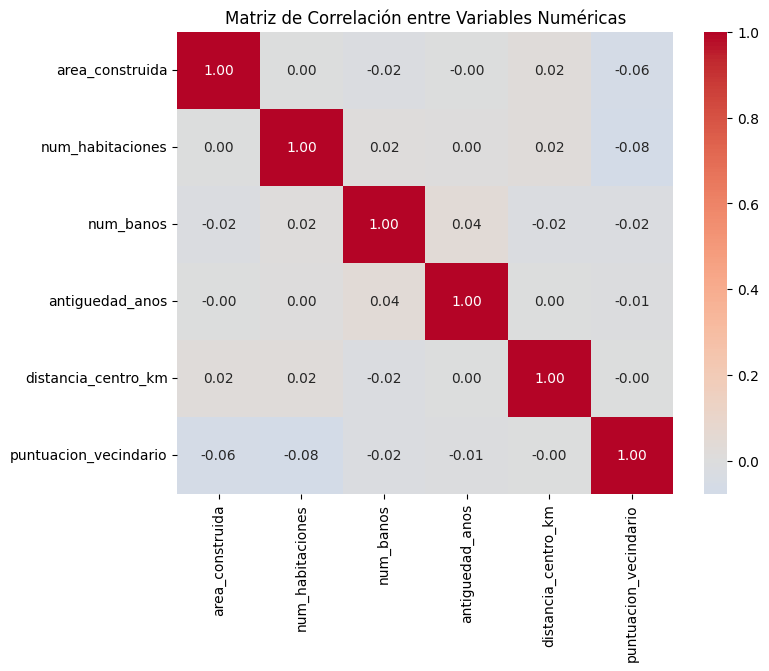

In [ ]:
# Seleccionar solo columnas numéricas para correlación
corr_cols = [col for col in numeric_cols if df[col].isnull().sum() < len(df)*0.5]  # Excluir columnas con muchos nulos

if len(corr_cols) > 1:
    # Calcular matriz de correlación
    corr_matrix = df[corr_cols].corr(numeric_only=True)

    # Gráfico de matriz de correlación
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
    plt.title('Matriz de Correlación entre Variables Numéricas')
    plt.show()
else:
    print("No hay suficientes variables numéricas para calcular correlaciones")

## Análisis de la variable objetivo

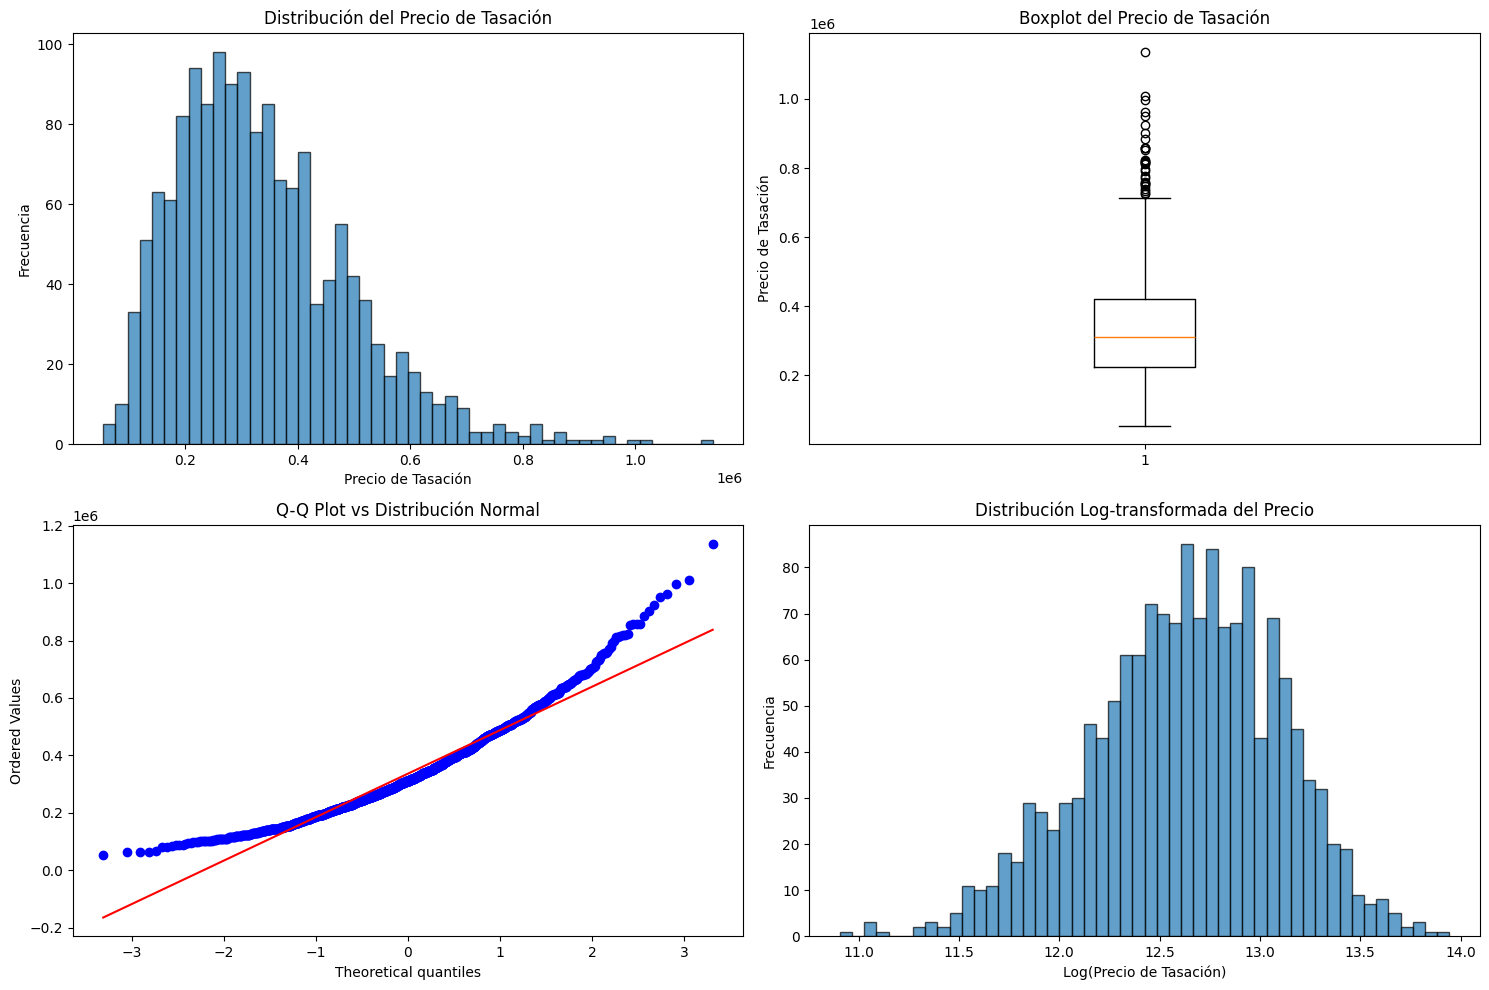

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histograma
axes[0, 0].hist(df[target_col], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribución del Precio de Tasación')
axes[0, 0].set_xlabel('Precio de Tasación')
axes[0, 0].set_ylabel('Frecuencia')

# Boxplot
axes[0, 1].boxplot(df[target_col])
axes[0, 1].set_title('Boxplot del Precio de Tasación')
axes[0, 1].set_ylabel('Precio de Tasación')

# Q-Q plot
stats.probplot(df[target_col], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot vs Distribución Normal')

# Histograma log-transformado
log_prices = np.log(df[target_col])
axes[1, 1].hist(log_prices, bins=50, edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Distribución Log-transformada del Precio')
axes[1, 1].set_xlabel('Log(Precio de Tasación)')
axes[1, 1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [ ]:
# Análisis de asimetría y curtosis
print(f"\nAsimetría: {stats.skew(df[target_col]):.3f}")
print(f"Curtosis: {stats.kurtosis(df[target_col]):.3f}")


Asimetría: 0.976
Curtosis: 1.368


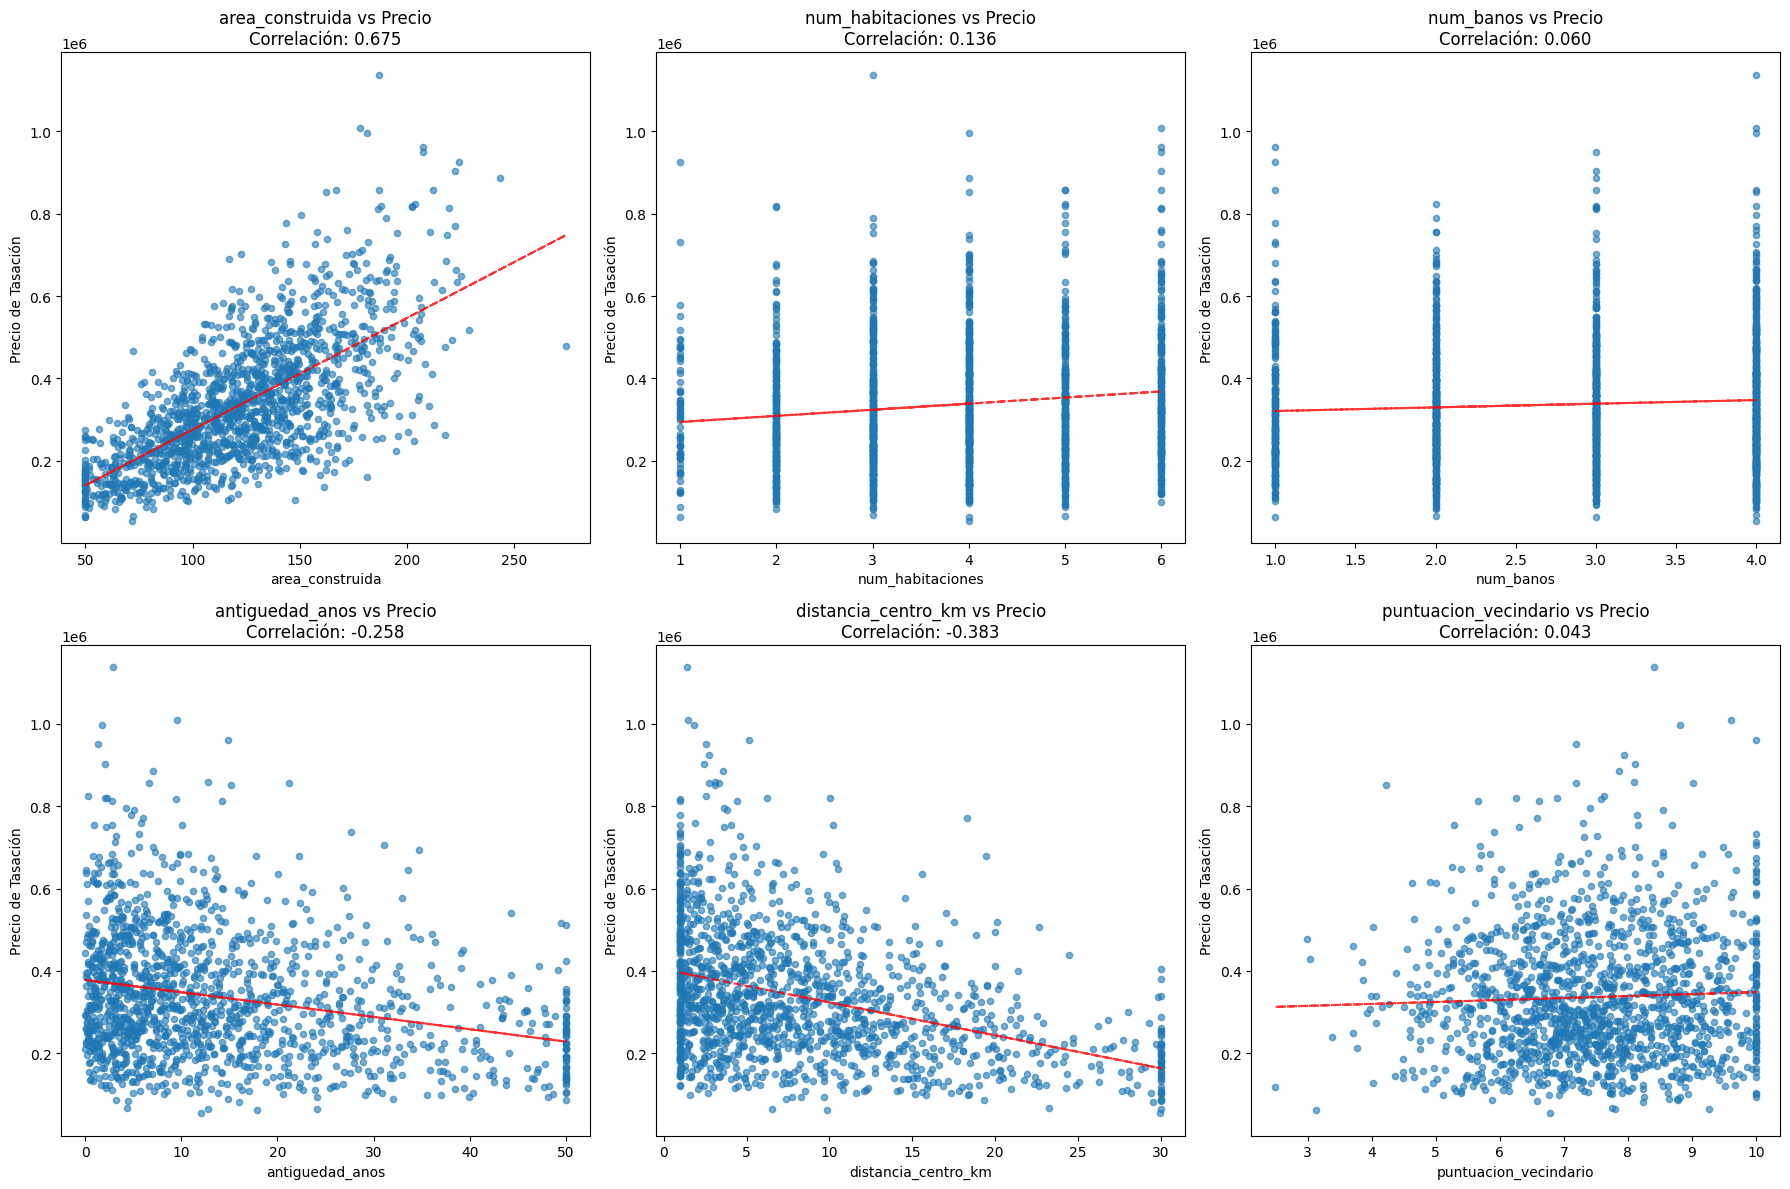

In [ ]:
# Relación entre variables numéricas y el precio

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

numeric_to_plot = [col for col in numeric_cols if col != target_col][:6]

for i, col in enumerate(numeric_to_plot):
    if i < len(axes):
        # Scatter plot
        axes[i].scatter(df[col], df[target_col], alpha=0.6, s=20)

        # Línea de regresión
        z = np.polyfit(df[col].dropna(), df[target_col][df[col].notna()], 1)
        p = np.poly1d(z)
        axes[i].plot(df[col].dropna(), p(df[col].dropna()), "r--", alpha=0.8)

        # Correlación
        corr = df[col].corr(df[target_col])
        axes[i].set_title(f'{col} vs Precio\nCorrelación: {corr:.3f}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Precio de Tasación')

plt.tight_layout()
plt.show()

# Creación del modelo

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Ingeniería de características

In [ ]:
# Seleccionar características para el modelo
features_to_use = [
    'area_construida', 'num_habitaciones', 'num_banos', 'antiguedad_anos',
    'tipo_propiedad', 'zona', 'tiene_garaje', 'tiene_jardin', 'tiene_piscina',
    'distancia_centro_km', 'puntuacion_vecindario'
]

# Separar características y variable objetivo
X = df[features_to_use].copy()
y = df[target_col].copy()

# Identificar tipos de variables
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'bool']).columns.tolist()

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore', drop='first'))
        ]), categorical_features)
    ]
)

## Modelos a utilizar

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, GridSearchCV
import time

In [ ]:
# Definir modelos a probar
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42),
    'SVR': SVR()
}

param_grids = {
    'RandomForestRegressor': {
        'regressor__n_estimators': [100, 200, 300],
        'regressor__max_depth': [None, 10, 20, 30],
        'regressor__min_samples_split': [2, 5, 10],
        'regressor__min_samples_leaf': [1, 2, 4]
    },
    'GradientBoostingRegressor': {
        'regressor__n_estimators': [100, 200, 300],
        'regressor__learning_rate': [0.01, 0.1, 0.2],
        'regressor__max_depth': [3, 5, 7],
        'regressor__subsample': [0.8, 0.9, 1.0]
    },
    'Ridge': {
        'regressor__alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]
    },
    'Lasso': {
        'regressor__alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]
    },
    'SVR': {
        'regressor__C': [0.1, 1, 10, 100],
        'regressor__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
        'regressor__kernel': ['rbf', 'linear']
    }
}

## Entrenar y evaluar modelos

In [ ]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Función para evaluar modelos
def evaluate_model(model, X_train, X_test, y_train, y_test, preprocessor):
    # Crear pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Entrenar el modelo
    start_time = time.time()
    pipeline.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Predicciones
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)

    # Métricas
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)

    # Validación cruzada
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5,
                            scoring='neg_mean_squared_error')
    cv_rmse_scores = np.sqrt(-cv_scores)
    cv_rmse = cv_rmse_scores.mean()
    cv_std = cv_rmse_scores.std()

    return {
        'model': model.__class__.__name__,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'cv_rmse': cv_rmse,
        'cv_std': cv_std,
        'training_time': training_time,
        'pipeline': pipeline,
        'predictions': y_pred_test
    }

In [ ]:
results = {}
for name, model in models.items():
    print(f"\nEvaluando {name}...")
    result = evaluate_model(model, X_train, X_test, y_train, y_test, preprocessor)
    results[name] = result

    print(f"RMSE Test: {result['test_rmse']:.2f}")
    print(f"MAE Test: {result['test_mae']:.2f}")
    print(f"R² Test: {result['test_r2']:.3f}")
    print(f"CV RMSE: {result['cv_rmse']:.2f} (±{result['cv_std']:.2f})")
    print(f"Tiempo de entrenamiento: {result['training_time']:.2f}s")

# Crear tabla resumen de resultados
results_df = pd.DataFrame({
    'Modelo': list(results.keys()),
    'RMSE_Test': [results[k]['test_rmse'] for k in results.keys()],
    'MAE_Test': [results[k]['test_mae'] for k in results.keys()],
    'R²_Test': [results[k]['test_r2'] for k in results.keys()],
    'CV_RMSE': [results[k]['cv_rmse'] for k in results.keys()],
    'Tiempo_Entrenamiento': [results[k]['training_time'] for k in results.keys()]
})

results_df = results_df.sort_values('R²_Test', ascending=False)
print("\nResumen de resultados:")
print(results_df.round(3))
# Identificar el mejor modelo

best_model_name = results_df.iloc[0]['Modelo']
best_model = results[best_model_name]
print(f"\nMejor modelo: {best_model_name}")
print(f"R² en test: {best_model['test_r2']:.3f}")
print(f"RMSE en test: {best_model['test_rmse']:.2f}")


Evaluando Linear Regression...
RMSE Test: 56223.48
MAE Test: 39335.16
R² Test: 0.878
CV RMSE: 51651.68 (±3959.71)
Tiempo de entrenamiento: 0.11s

Evaluando Ridge...
RMSE Test: 56207.95
MAE Test: 39229.68
R² Test: 0.878
CV RMSE: 51670.56 (±3985.25)
Tiempo de entrenamiento: 0.07s

Evaluando Lasso...
RMSE Test: 56223.25
MAE Test: 39334.05
R² Test: 0.878
CV RMSE: 51651.77 (±3960.07)
Tiempo de entrenamiento: 0.05s

Evaluando RandomForestRegressor...
RMSE Test: 72748.21
MAE Test: 53614.91
R² Test: 0.796
CV RMSE: 72741.83 (±3743.47)
Tiempo de entrenamiento: 1.34s

Evaluando GradientBoostingRegressor...
RMSE Test: 57233.68
MAE Test: 40179.79
R² Test: 0.874
CV RMSE: 57846.89 (±5111.22)
Tiempo de entrenamiento: 0.35s

Evaluando SVR...
RMSE Test: 161684.32
MAE Test: 120623.03
R² Test: -0.006
CV RMSE: 155210.41 (±9640.64)
Tiempo de entrenamiento: 0.14s

Resumen de resultados:
                      Modelo   RMSE_Test    MAE_Test  R²_Test     CV_RMSE  \
1                      Ridge   56207.951   39

In [ ]:
# Optimizar el mejor modelo
print(f"\nOptimizando hiperparámetros para {best_model_name}...")

# Crear pipeline base
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', models[best_model_name])
])

# Grid search
grid_search = GridSearchCV(
    pipeline,
    param_grids[best_model_name],
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Evaluar modelo optimizado
optimized_result = evaluate_model(
    grid_search.best_estimator_.named_steps['regressor'],
    X_train, X_test, y_train, y_test, preprocessor
)

print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"R² optimizado: {optimized_result['test_r2']:.3f}")
print(f"RMSE optimizado: {optimized_result['test_rmse']:.2f}")

# Actualizar mejor modelo si mejoró
if optimized_result['test_r2'] > best_model['test_r2']:
    best_model = optimized_result
    best_model['pipeline'] = grid_search.best_estimator_
    print("¡El modelo optimizado mejoró el rendimiento!")


Optimizando hiperparámetros para Ridge...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Mejores parámetros: {'regressor__alpha': 0.1}
R² optimizado: 0.878
RMSE optimizado: 56220.90


## Análisis de residuos

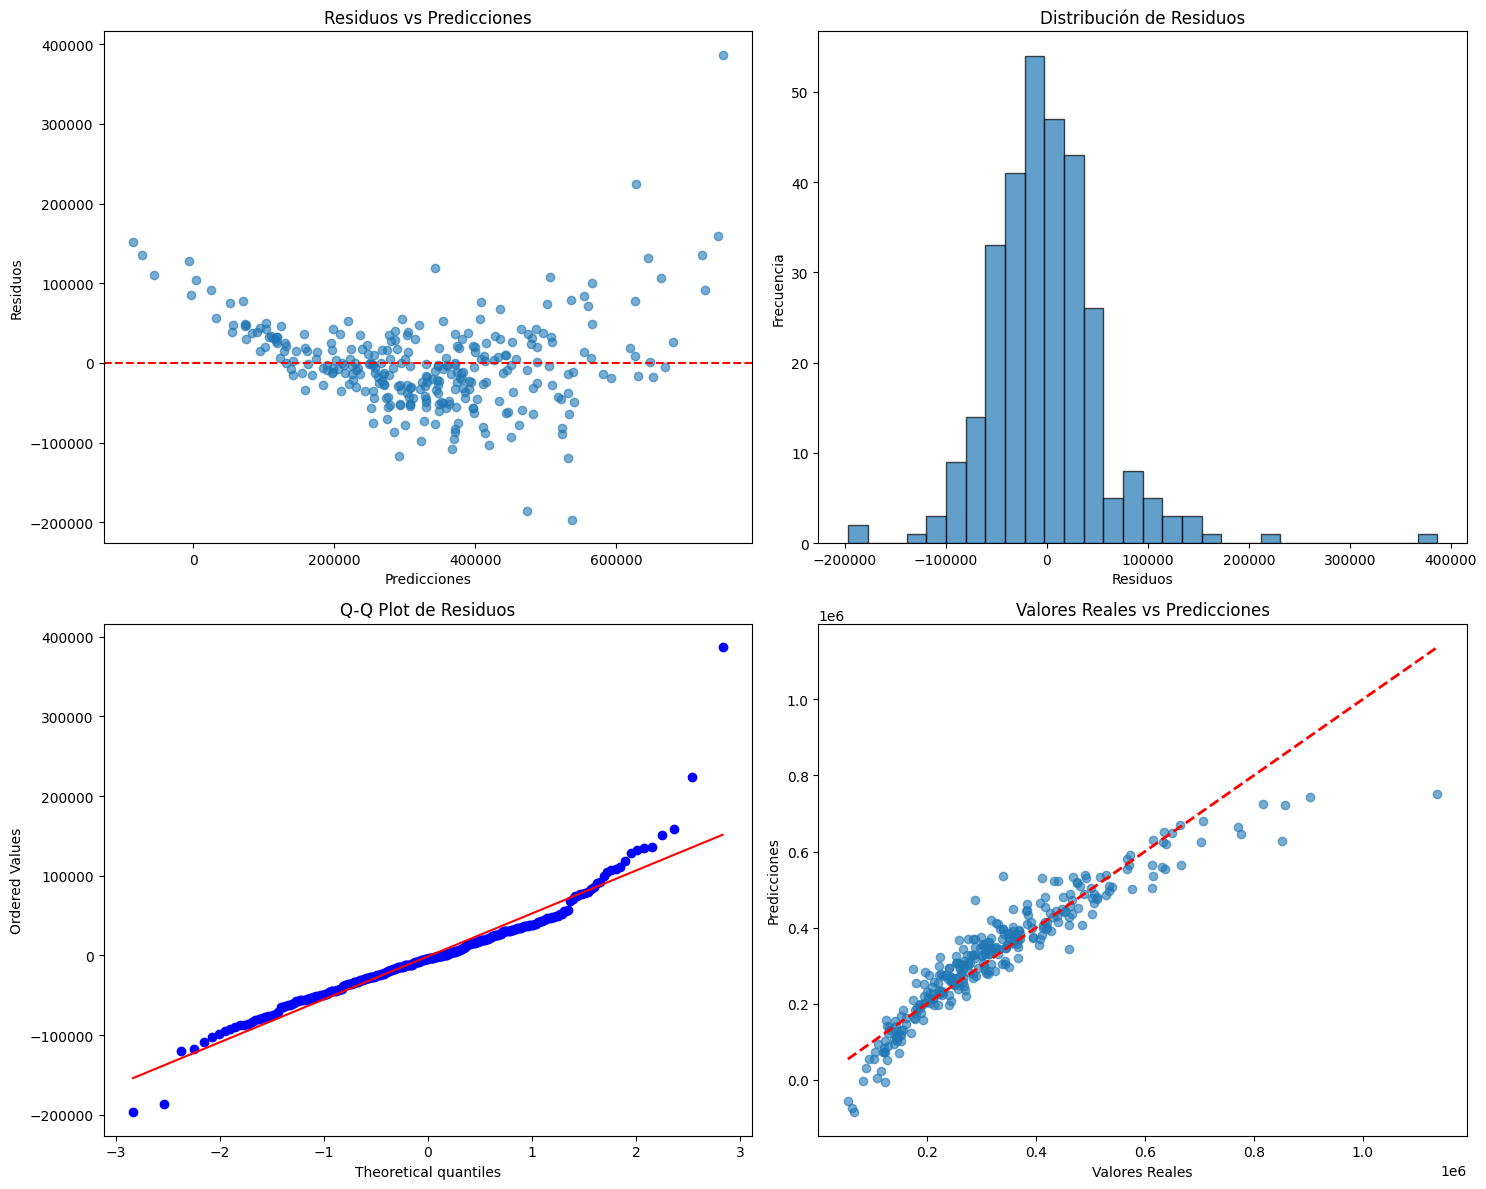

In [ ]:
# Obtener predicciones del mejor modelo
y_pred_best = best_model['predictions']
residuals = y_test - y_pred_best

# Gráficos de residuos
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Residuos vs predicciones
axes[0, 0].scatter(y_pred_best, residuals, alpha=0.6)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Predicciones')
axes[0, 0].set_ylabel('Residuos')
axes[0, 0].set_title('Residuos vs Predicciones')

# Histograma de residuos
axes[0, 1].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Residuos')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].set_title('Distribución de Residuos')

# Q-Q plot de residuos
stats.probplot(residuals, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot de Residuos')

# Valores reales vs predicciones
axes[1, 1].scatter(y_test, y_pred_best, alpha=0.6)
axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1, 1].set_xlabel('Valores Reales')
axes[1, 1].set_ylabel('Predicciones')
axes[1, 1].set_title('Valores Reales vs Predicciones')

plt.tight_layout()
plt.show()

In [ ]:
# Análisis estadístico de residuos
print("\nAnálisis de residuos:")
print(f"Media de residuos: {residuals.mean():.3f}")
print(f"Desviación estándar: {residuals.std():.3f}")
print(f"Asimetría: {stats.skew(residuals):.3f}")
print(f"Curtosis: {stats.kurtosis(residuals):.3f}")


Análisis de residuos:
Media de residuos: -1212.360
Desviación estándar: 56288.768
Asimetría: 1.319
Curtosis: 8.260


In [ ]:
# Test de normalidad
statistic, p_value = stats.shapiro(residuals)
print(f"\nTest de normalidad de Shapiro-Wilk:")
print(f"Estadístico: {statistic:.3f}")
print(f"p-valor: {p_value:.3f}")
print(f"Los residuos {'siguen' if p_value > 0.05 else 'no siguen'} una distribución normal")


Test de normalidad de Shapiro-Wilk:
Estadístico: 0.913
p-valor: 0.000
Los residuos no siguen una distribución normal


## Análisis de errores por segmentos

In [ ]:
# Análisis de errores por rangos de precio
price_ranges = pd.cut(y_test, bins=5, labels=['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto'])
error_by_range = pd.DataFrame({
    'rango_precio': price_ranges,
    'error_absoluto': np.abs(residuals),
    'error_relativo': np.abs(residuals) / y_test * 100
})

In [ ]:
error_summary = error_by_range.groupby('rango_precio').agg({
    'error_absoluto': ['mean', 'std', 'count'],
    'error_relativo': ['mean', 'std']
}).round(2)
display(error_summary)

/tmp/ipython-input-31-531680706.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  error_summary = error_by_range.groupby('rango_precio').agg({


error_absoluto                 error_relativo       
                       mean       std count           mean    std
rango_precio                                                     
Muy Bajo           34817.81  31010.33   126          24.01  36.18
Bajo               36959.52  32514.94   132          10.68   9.96
Medio              36496.48  29775.00    34           6.33   4.82
Alto              125066.33  61024.90     7          15.08   6.86
Muy Alto          386858.74       NaN     1          34.01    NaN

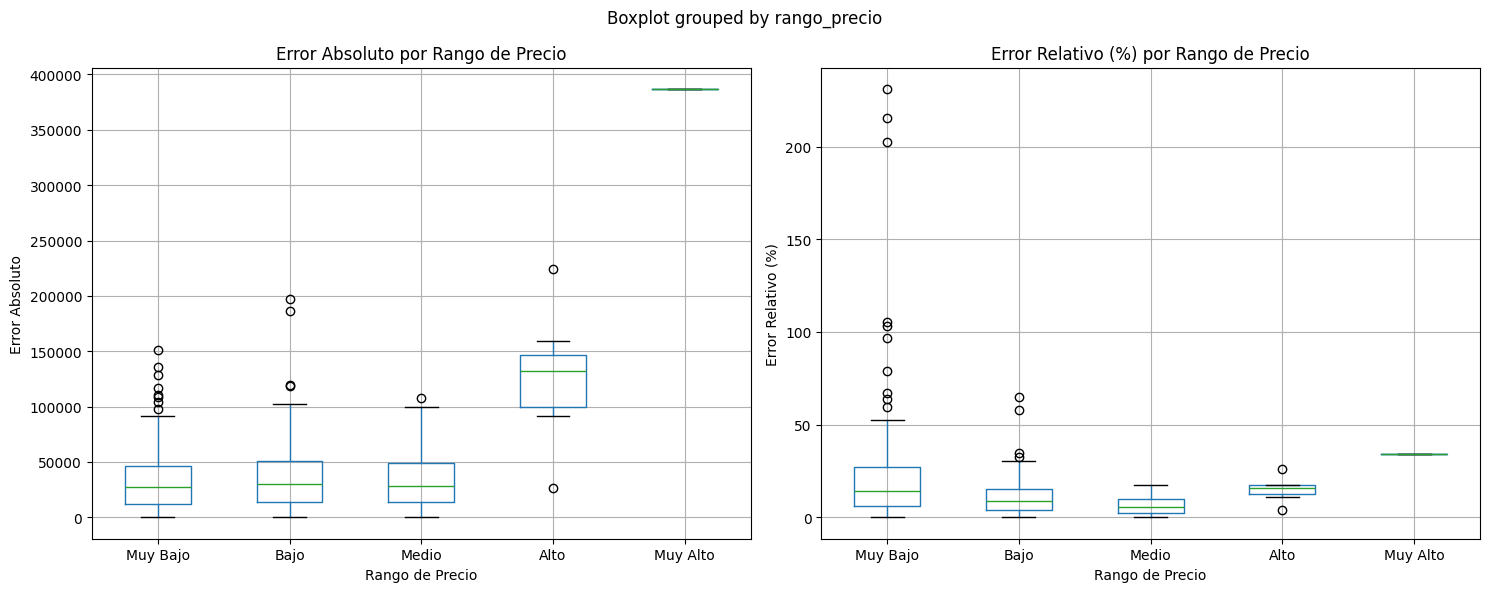

In [ ]:
# Visualización de errores por rango
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Error absoluto por rango
error_by_range.boxplot(column='error_absoluto', by='rango_precio', ax=axes[0])
axes[0].set_title('Error Absoluto por Rango de Precio')
axes[0].set_xlabel('Rango de Precio')
axes[0].set_ylabel('Error Absoluto')

# Error relativo por rango
error_by_range.boxplot(column='error_relativo', by='rango_precio', ax=axes[1])
axes[1].set_title('Error Relativo (%) por Rango de Precio')
axes[1].set_xlabel('Rango de Precio')
axes[1].set_ylabel('Error Relativo (%)')

plt.tight_layout()
plt.show()